In [1]:
# Importing libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import MultiTaskElasticNet
from sklearn.metrics import mean_squared_error

# Loading the dataset
data = pd.read_csv('student-por.csv')

In [2]:
# Checking for missing values
missing_values = data.isnull().sum()
print("Missing values:\n", missing_values)

# Encoding categorical variables
data_encoded = pd.get_dummies(data, drop_first=True)


Missing values:
 school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64


In [3]:
# Defining features and target variables
X = data_encoded.drop(['G1', 'G2', 'G3'], axis=1)
y = data_encoded[['G1', 'G2', 'G3']]


In [4]:
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
# Initializing the Multi-task Elastic-Net model
elastic_net_model = MultiTaskElasticNet(alpha=0.5, l1_ratio=0.5)

# Fitting the model on the training data
elastic_net_model.fit(X_train, y_train)


MultiTaskElasticNet(alpha=0.5)

In [6]:
# Retrieving the coefficients of the model
coefficients = elastic_net_model.coef_
print("Coefficients of the Multi-task Elastic-Net model:\n", coefficients)


Coefficients of the Multi-task Elastic-Net model:
 [[-0.07263243  0.2404975   0.14279578 -0.04647773  0.25427616 -0.60159541
   0.02516273 -0.         -0.01428025 -0.19528459 -0.06871788 -0.05202009
  -0.0562419  -0.38824929 -0.          0.          0.          0.
   0.          0.          0.          0.         -0.          0.
  -0.          0.          0.         -0.          0.01461938 -0.
  -0.         -0.         -0.         -0.          0.         -0.
   0.16012592  0.         -0.        ]
 [-0.01763526  0.28122539  0.16763118 -0.05745847  0.24742634 -0.66762123
   0.03957278 -0.         -0.02612762 -0.21333729 -0.08739684 -0.09392067
  -0.05029979 -0.38179779 -0.          0.          0.         -0.
   0.          0.         -0.          0.         -0.          0.
  -0.          0.          0.         -0.          0.01966256 -0.
  -0.         -0.          0.         -0.          0.          0.
   0.15191707  0.         -0.        ]
 [-0.0266236   0.25376052  0.17148779 -0.048323

How to predict the target variables (G1, G2, G3) on the test set?

In [7]:
# Predicting on the test set
y_pred = elastic_net_model.predict(X_test)


What is the Mean Squared Error of the Multi-task Elastic-Net model?

In [8]:
# Calculating Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error of the Multi-task Elastic-Net model:", mse)


Mean Squared Error of the Multi-task Elastic-Net model: 7.875131199196389


How to perform hyperparameter tuning for the Multi-task Elastic-Net model?

In [9]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {'alpha': [0.1, 0.5, 1.0], 'l1_ratio': [0.2, 0.5, 0.8]}

# Initialize the Multi-task Elastic-Net model
elastic_net_model = MultiTaskElasticNet()

# Perform Grid Search Cross-Validation
grid_search = GridSearchCV(elastic_net_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Retrieve the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)


Best Hyperparameters: {'alpha': 0.1, 'l1_ratio': 0.8}


How to visualize the predictions of the Multi-task Elastic-Net model?

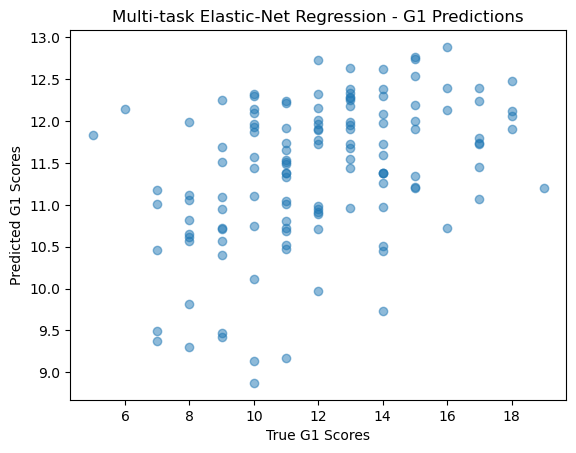

In [11]:
import matplotlib.pyplot as plt

# Visualize predictions for a specific target variable (e.g., G1)
plt.scatter(y_test['G1'], y_pred[:, 0], alpha=0.5)
plt.xlabel("True G1 Scores")
plt.ylabel("Predicted G1 Scores")
plt.title("Multi-task Elastic-Net Regression - G1 Predictions")
plt.show()


How to perform cross-validation for the Multi-task Elastic-Net model?

In [13]:
from sklearn.model_selection import cross_val_score

# Define the Multi-task Elastic-Net model
elastic_net_model = MultiTaskElasticNet(alpha=0.5, l1_ratio=0.5)

# Perform cross-validation
cv_scores = cross_val_score(elastic_net_model, X, y, cv=5, scoring='neg_mean_squared_error')

# Display cross-validation scores
print("Cross-Validation Scores (Negative Mean Squared Error):", cv_scores)


Cross-Validation Scores (Negative Mean Squared Error): [ -3.9551778   -4.91085647  -6.82010506  -6.94742448 -14.13814992]


How to analyze the residuals of the Multi-task Elastic-Net model?

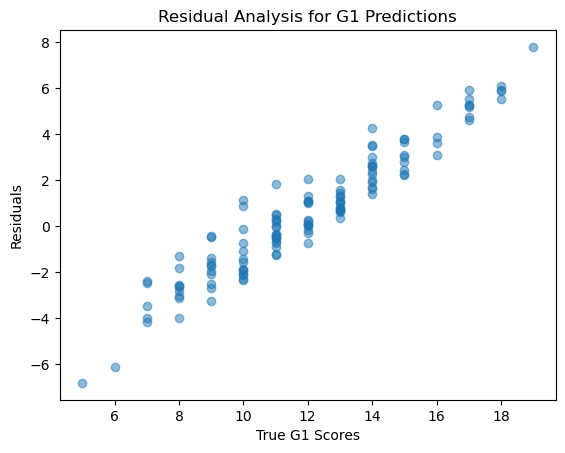

In [14]:
# Calculate residuals
residuals = y_test - y_pred

# Plot residuals for a specific target variable (e.g., G1)
plt.scatter(y_test['G1'], residuals['G1'], alpha=0.5)
plt.xlabel("True G1 Scores")
plt.ylabel("Residuals")
plt.title("Residual Analysis for G1 Predictions")
plt.show()


Is feature scaling necessary for Multi-task Elastic-Net Regression, and how can it be done?

In [17]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Scale the features
X_scaled = scaler.fit_transform(X)


How to assess the robustness of the Multi-task Elastic-Net model?

In [18]:
from sklearn.utils import resample

# Bootstrap resampling for robustness assessment
n_iterations = 100
mse_scores = []

for _ in range(n_iterations):
    # Bootstrap resample the dataset
    X_resampled, y_resampled = resample(X_train, y_train, replace=True)
    
    # Fit the model on resampled data
    elastic_net_model.fit(X_resampled, y_resampled)
    
    # Evaluate the model on the test set
    y_pred_resampled = elastic_net_model.predict(X_test)
    mse_resampled = mean_squared_error(y_test, y_pred_resampled)
    
    mse_scores.append(mse_resampled)

# Calculate the mean and confidence interval of MSE scores
mean_mse = np.mean(mse_scores)
confidence_interval = np.percentile(mse_scores, [2.5, 97.5])

print(f"Mean MSE: {mean_mse:.4f}")
print(f"95% Confidence Interval: [{confidence_interval[0]:.4f}, {confidence_interval[1]:.4f}]")


Mean MSE: 9.5291
95% Confidence Interval: [9.3241, 9.8232]


How to identify and handle outliers in the target variables?

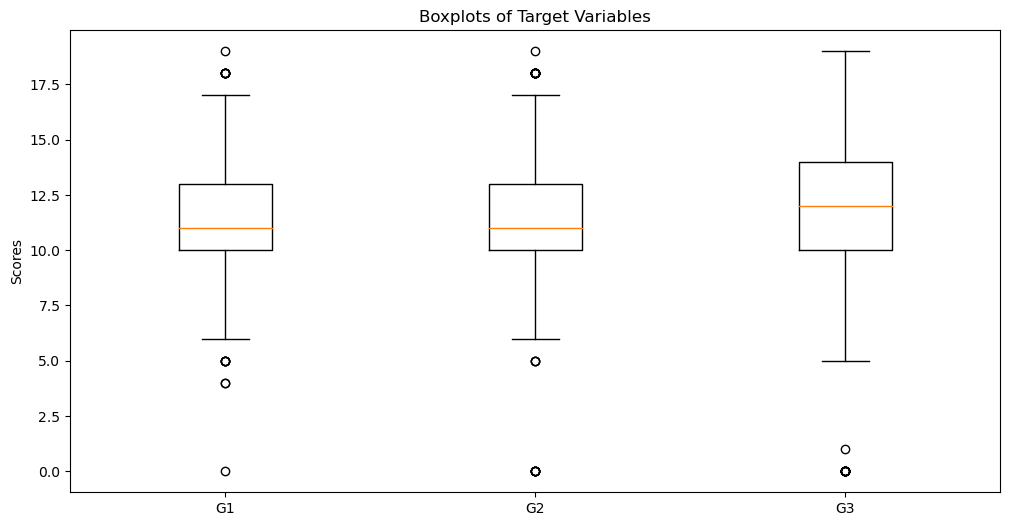

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Assuming y is your DataFrame or dictionary with keys 'G1', 'G2', and 'G3'
# Visualize boxplots for G1, G2, and G3
plt.figure(figsize=(12, 6))
plt.boxplot([y['G1'], y['G2'], y['G3']], labels=['G1', 'G2', 'G3'])
plt.title('Boxplots of Target Variables')
plt.ylabel('Scores')
plt.show()

# Identify and remove outliers (considering a z-score threshold)
z_threshold = 3
outlier_mask = np.abs(stats.zscore(y)) > z_threshold
y_no_outliers = y[~outlier_mask.any(axis=1)]



How to save and load the trained Multi-task Elastic-Net model?

In [21]:
import joblib

# Save the trained model
joblib.dump(elastic_net_model, 'multi_task_elastic_net_model.joblib')

# Load the saved model
loaded_model = joblib.load('multi_task_elastic_net_model.joblib')


How to create new features or perform feature engineering for Multi-task Elastic-Net?

In [23]:
# Example: Creating a new feature representing the total study time
data['total_study_time'] = data['studytime'] + data['traveltime']

# Update X with the new feature
X = pd.get_dummies(data.drop(['G1', 'G2', 'G3'], axis=1), drop_first=True)

# Re-train the Multi-task Elastic-Net model with the updated features
elastic_net_model.fit(X_train, y_train)


MultiTaskElasticNet(alpha=10.0)

How to compare the performance of Multi-task Elastic-Net with other regression models?

In [25]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

# Example: Comparing Linear Regression, Ridge, Lasso, and Multi-task Elastic-Net
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Multi-task Elastic-Net': MultiTaskElasticNet(alpha=0.5, l1_ratio=0.5)
}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_model = model.predict(X_test)
    mse_model = mean_squared_error(y_test, y_pred_model)
    print(f"{model_name} - Mean Squared Error: {mse_model:.4f}")


Linear Regression - Mean Squared Error: 7.8617
Ridge Regression - Mean Squared Error: 7.8258
Lasso Regression - Mean Squared Error: 9.4243
Multi-task Elastic-Net - Mean Squared Error: 7.8751


How to detect and address heteroscedasticity in Multi-task Elastic-Net predictions?

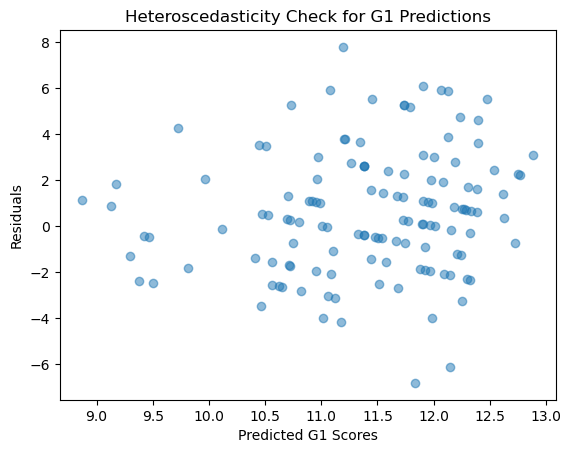

In [29]:
# Calculate residuals
residuals = y_test - y_pred

# Plot residuals against predicted values for G1
plt.scatter(y_pred[:, 0], residuals['G1'], alpha=0.5)
plt.xlabel("Predicted G1 Scores")
plt.ylabel("Residuals")
plt.title("Heteroscedasticity Check for G1 Predictions")
plt.show()


How to handle time series aspects in Multi-task Elastic-Net?

In [30]:
# Example: Consider incorporating lagged features for time series analysis
lagged_features = ['G1_lag1', 'G2_lag1', 'G3_lag1']
data[lagged_features] = data[['G1', 'G2', 'G3']].shift(1)

# Update X with lagged features
X_with_lags = pd.get_dummies(data.drop(['G1', 'G2', 'G3'], axis=1), drop_first=True)


How to visualize the distribution of target variables?

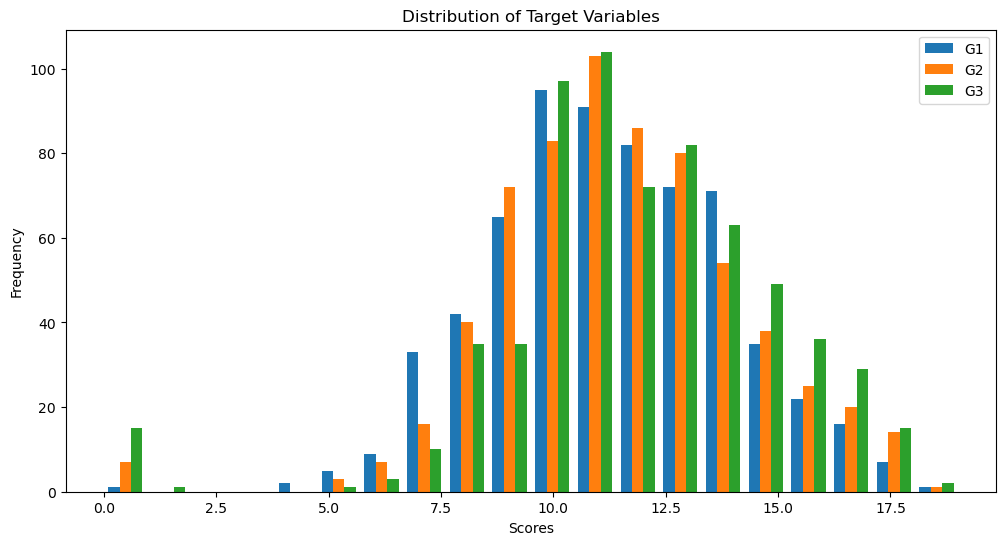

In [33]:
# Visualize the distribution of G1, G2, G3 using histograms
plt.figure(figsize=(12, 6))
plt.hist([data['G1'], data['G2'], data['G3']], bins=20, label=['G1', 'G2', 'G3'])
plt.legend()
plt.title("Distribution of Target Variables")
plt.xlabel("Scores")
plt.ylabel("Frequency")
plt.show()


How to create a residuals vs. fitted values plot for model evaluation?

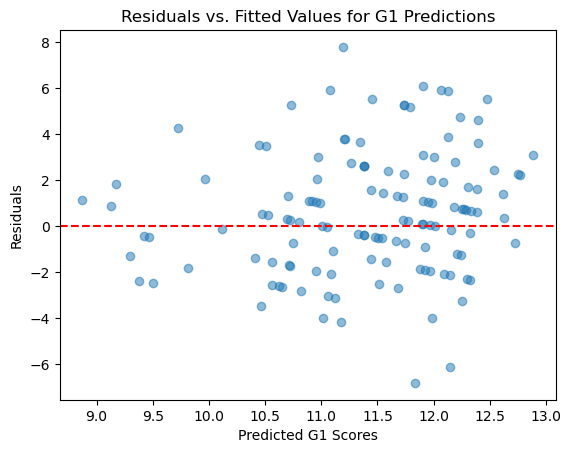

In [34]:
# Calculate residuals
residuals = y_test - y_pred

# Plot residuals against fitted values for G1
plt.scatter(y_pred[:, 0], residuals['G1'], alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted G1 Scores")
plt.ylabel("Residuals")
plt.title("Residuals vs. Fitted Values for G1 Predictions")
plt.show()


How to use violin plots to visualize the distribution of a continuous variable across different categories?

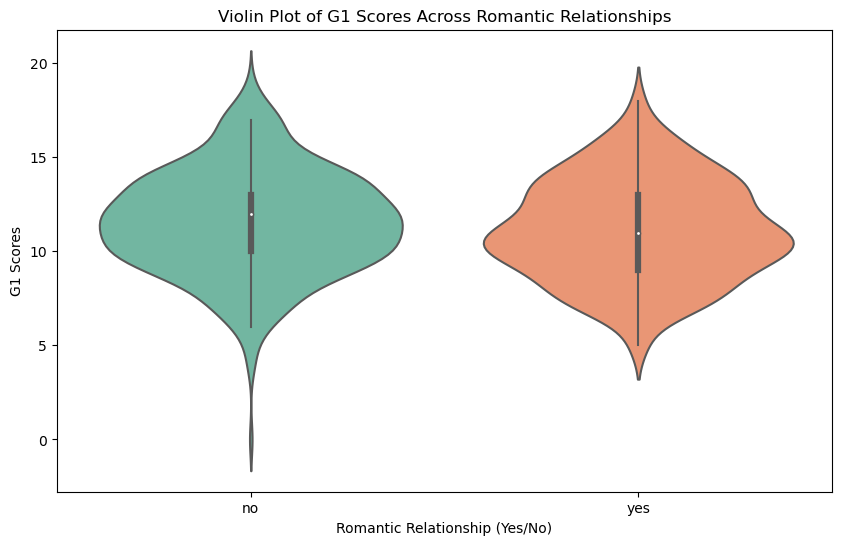

In [35]:
# Example: Violin plot for G1 scores across different romantic relationships
plt.figure(figsize=(10, 6))
sns.violinplot(x='romantic', y='G1', data=data, palette='Set2')
plt.title("Violin Plot of G1 Scores Across Romantic Relationships")
plt.xlabel("Romantic Relationship (Yes/No)")
plt.ylabel("G1 Scores")
plt.show()


How to use boxplots to visualize the distribution of a continuous variable across different categories?

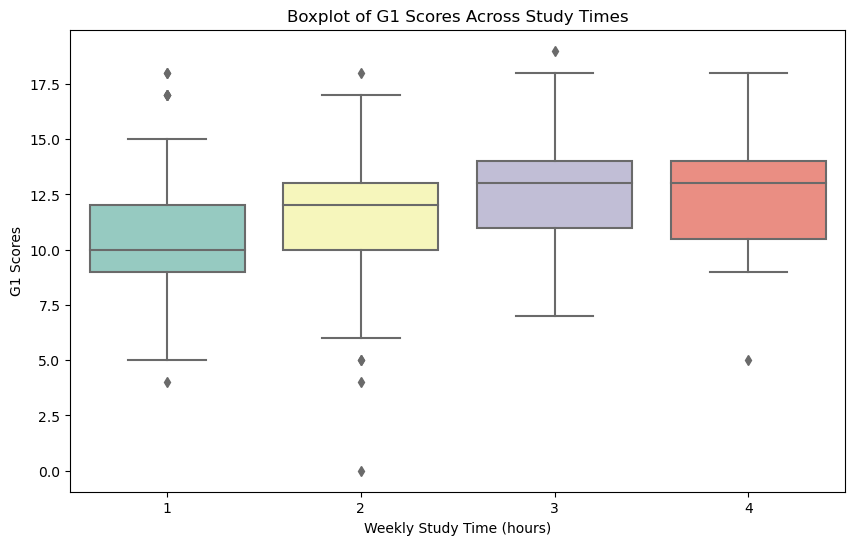

In [38]:
# Example: Boxplot for G1 scores across different study times
plt.figure(figsize=(10, 6))
sns.boxplot(x='studytime', y='G1', data=data, palette='Set3')
plt.title("Boxplot of G1 Scores Across Study Times")
plt.xlabel("Weekly Study Time (hours)")
plt.ylabel("G1 Scores")
plt.show()


How to create a scatterplot to visualize the pairwise correlation between two variables?

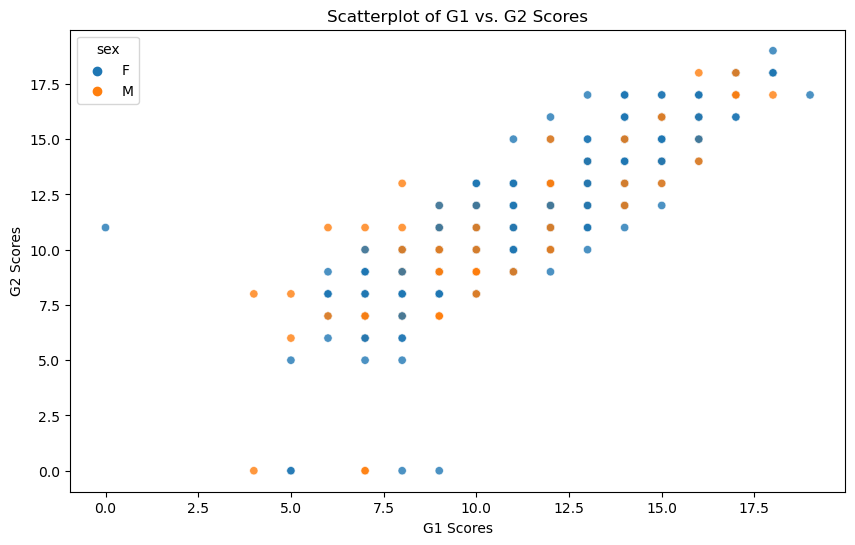

In [39]:
# Example: Scatterplot for G1 vs. G2 scores
plt.figure(figsize=(10, 6))
sns.scatterplot(x='G1', y='G2', data=data, hue='sex', alpha=0.8)
plt.title("Scatterplot of G1 vs. G2 Scores")
plt.xlabel("G1 Scores")
plt.ylabel("G2 Scores")
plt.show()


How to visualize the distribution of numerical variables using histograms?

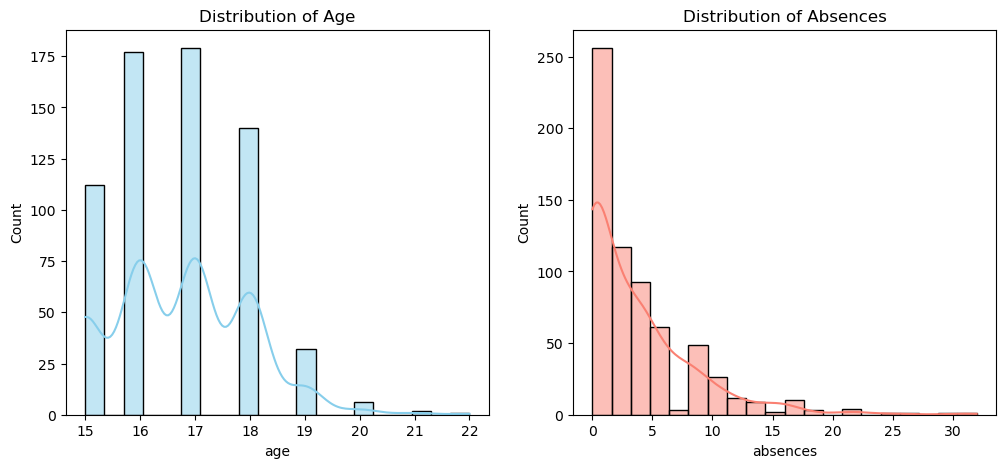

In [40]:
# Example: Histograms for age and absences
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
sns.histplot(data['age'], bins=20, kde=True, ax=axes[0], color='skyblue')
axes[0].set_title("Distribution of Age")

sns.histplot(data['absences'], bins=20, kde=True, ax=axes[1], color='salmon')
axes[1].set_title("Distribution of Absences")

plt.show()


How to create a 3D scatter plot for exploring relationships between three variables?

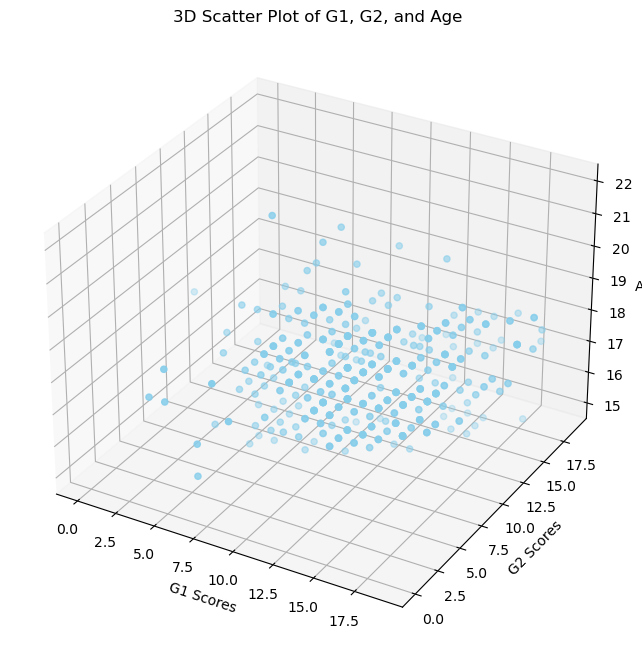

In [41]:
from mpl_toolkits.mplot3d import Axes3D

# Example: 3D Scatter plot for G1, G2, and age
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['G1'], data['G2'], data['age'], c='skyblue', marker='o')
ax.set_xlabel('G1 Scores')
ax.set_ylabel('G2 Scores')
ax.set_zlabel('Age')
ax.set_title('3D Scatter Plot of G1, G2, and Age')
plt.show()


How to create a radar chart for comparing multiple variables across different categories?

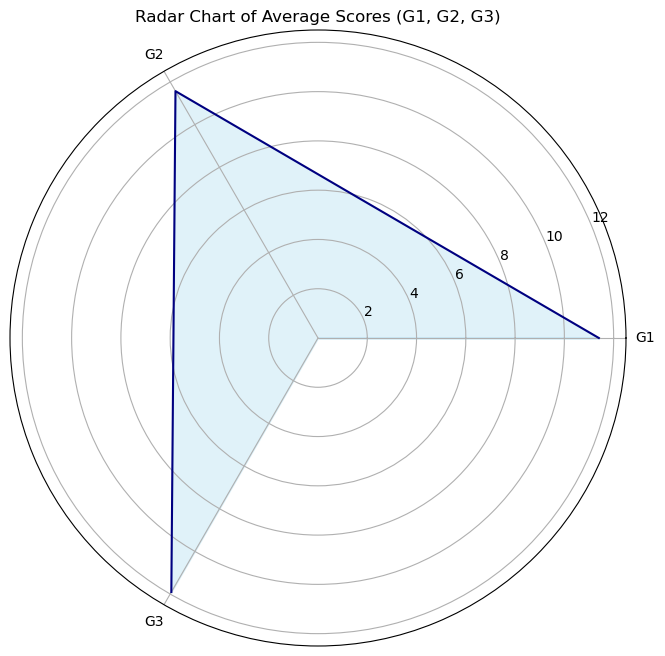

In [42]:
# Example: Radar chart for comparing average scores across G1, G2, and G3
average_scores = data[['G1', 'G2', 'G3']].mean()

categories = list(average_scores.index)
values = average_scores.values

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
ax.fill_between(np.linspace(0, 2 * np.pi, len(categories), endpoint=False), values, alpha=0.25, color='skyblue')
ax.plot(np.linspace(0, 2 * np.pi, len(categories), endpoint=False), values, color='navy')
ax.set_xticks(np.linspace(0, 2 * np.pi, len(categories), endpoint=False))
ax.set_xticklabels(categories)
ax.set_title("Radar Chart of Average Scores (G1, G2, G3)")
plt.show()
